In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

C:\Users\Paolo\AppData\Local\Temp\ipykernel_27932\1123596123.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
# WITH OANDA
import tpqoa
api = tpqoa.tpqoa("oandaMY.cfg")

In [3]:
# WITH IBKR
import pandas as pd
from ib_insync import *
util.startLoop()  # not necessary in scripts
ib = IB()
ib.connect()

<IB connected to 127.0.0.1:7497 clientId=1>

In [4]:
# WITH OANDA
df = api.get_history(instrument = "BTC_USD", start = "2021-09-24", end = "2024-09-24", granularity = "D", price = "M")
# we change the column names to match IBKR
df.rename(columns={"o":"open","h":"high","l":"low","c":"close","time":"date"},inplace=True)
df.index.names = ['date']
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2021-09-23 21:00:00 to 2024-09-23 21:00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      782 non-null    float64
 1   high      782 non-null    float64
 2   low       782 non-null    float64
 3   close     782 non-null    float64
 4   volume    782 non-null    int64  
 5   complete  782 non-null    bool   
dtypes: bool(1), float64(4), int64(1)
memory usage: 37.4 KB


In [5]:
# WITH IBKR
print(ib.qualifyContracts(Crypto("BTC",exchange='PAXOS')))
df = pd.DataFrame(ib.reqHistoricalData( Crypto("BTC",exchange='PAXOS'), endDateTime = "20240924 00:00:00", 
                                  barSizeSetting="1 day", durationStr="3 Y", 
                                  whatToShow= "MIDPOINT", useRTH = True, formatDate=2 )).set_index("date")
df.index=pd.to_datetime(df.index)
df.info()

[Crypto(conId=479624278, symbol='BTC', exchange='PAXOS', currency='USD', localSymbol='BTC.USD', tradingClass='BTC')]
<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, 2021-09-27 to 2024-09-24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      782 non-null    float64
 1   high      782 non-null    float64
 2   low       782 non-null    float64
 3   close     782 non-null    float64
 4   volume    782 non-null    float64
 5   average   782 non-null    float64
 6   barCount  782 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 48.9+ KB


In [6]:
df

open      high       low     close  volume  average  barCount
date                                                                         
2021-09-27  41986.25  44350.50  40798.50  43051.00    -1.0     -1.0        -1
2021-09-28  43036.75  43411.00  41121.00  41590.75    -1.0     -1.0        -1
2021-09-29  41627.25  42583.25  40781.00  41179.75    -1.0     -1.0        -1
2021-09-30  41165.75  44112.50  40913.00  43586.75    -1.0     -1.0        -1
2021-10-01  43648.00  48167.00  43125.75  48038.25    -1.0     -1.0        -1
...              ...       ...       ...       ...     ...      ...       ...
2024-09-18  59832.75  61332.50  59278.00  60055.75    -1.0     -1.0        -1
2024-09-19  59823.25  63850.25  59520.75  63271.25    -1.0     -1.0        -1
2024-09-20  63241.75  64100.00  62350.00  62815.00    -1.0     -1.0        -1
2024-09-23  62873.75  64713.75  62403.25  63303.75    -1.0     -1.0        -1
2024-09-24  63287.00  64364.00  62724.00  64324.50    -1.0     -1.0        -1

[782 rows x 7 columns]

In [8]:
df = df["close"].to_frame()

In [9]:
df.head()

close
date                
2021-09-27  43051.00
2021-09-28  41590.75
2021-09-29  41179.75
2021-09-30  43586.75
2021-10-01  48038.25

In [10]:
df["logreturns"] = np.log(df["close"])-np.log(df["close"].shift(1))

In [11]:
df.head()

close   returns
date                          
2021-09-27  43051.00       NaN
2021-09-28  41590.75 -0.034508
2021-09-29  41179.75 -0.009931
2021-09-30  43586.75  0.056807
2021-10-01  48038.25  0.097244

In [12]:
df.dropna(inplace=True)

## Strategia Buy and hold

<Axes: ylabel='Frequency'>

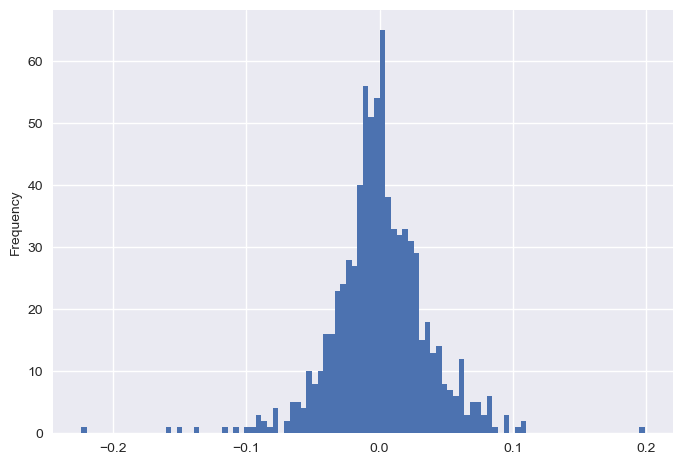

In [13]:
df.logreturns.plot(kind="hist", bins=100)

In [14]:
np.log(df.close.iloc[-1])-np.log(df.close.iloc[0]) # questo è il log return su tutto il periodo

0.43606279833672623

In [15]:
df.logreturns.sum() # questa è la stessa cosa, ma stavolta calcolata come somma dei log return giornalieri
# possiamo fare la somma SOLO PERCHE' sono log return. Se fossero stati simple returns avremmo dovuto fare la produttoria di (1+r)

0.40155512570233043

Se vogliamo vedere come è diventato 1 dollaro investito a inizio periodo, dato che $${\text LR}= \log \frac{P_{fine}}{P_{inizio}} \ \ \ \ \ \   \exp^{\text LR}= \frac{P_{fine}}{P_{inizio}}  \ \ \ \ \ \   P_{fine}=P_{inizio}\cdot \exp^{\text LR}$$

In [16]:
print(np.exp(df.returns.sum())) # questo è il coefficiente che moltiplica il prezzo iniziale per ottenere quello finale
print(np.exp(df.returns.sum())-1) # questo è il rendimento effettivo

1.4941464774337396
0.49414647743373963


In [17]:
# vediamo adesso il logreturn dall'INIZIO fino ad ogni giorno
df["cumlogret"]=df.logreturns.cumsum() # questo calcola la somma dal'inizio fino al giorno stesso
df["valore1"]=np.exp(df.logreturns.cumsum()) # questo calcola il valore di 1 dollaro investito all'inizio fino al giorno stesso
df.head()

close   returns    cumret   valore1
date                                              
2021-09-28  41590.75 -0.034508 -0.034508  0.966081
2021-09-29  41179.75 -0.009931 -0.044439  0.956534
2021-09-30  43586.75  0.056807  0.012368  1.012445
2021-10-01  48038.25  0.097244  0.109612  1.115845
2021-10-04  49363.00  0.027204  0.136816  1.146617

<Axes: xlabel='date'>

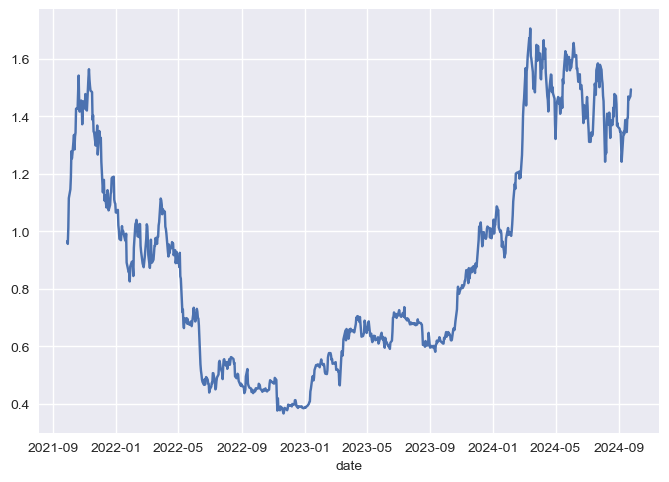

In [18]:
df.valore1.plot()

## Metriche di performance - Performance metrics

In [19]:
df.describe()

close     returns      cumret     valore1
count    781.000000  781.000000  781.000000  781.000000
mean   38589.556658    0.000514   -0.203016    0.896368
std    16541.682207    0.035416    0.436710    0.384235
min    15773.250000   -0.224232   -1.004070    0.366385
25%    24818.000000   -0.016935   -0.550816    0.576479
50%    35026.500000   -0.000227   -0.206281    0.813605
75%    51997.500000    0.018901    0.188810    1.207812
max    73460.500000    0.199074    0.534362    1.706360

In [22]:
# rendimento logaritmico medio giornaliero 
print(df.logreturns.mean())
# rendimento logaritmico mediano giornaliero 
print(df.logreturns.median())
# volatilità (dei rendimenti logaritmici  giornalieri)
print(df.returns.std())
# rendimento logaritmico assoluto
print(df.cumlogret.iloc[-1])  
# oppure  
print(df.logreturns.sum())
# oppure
print(np.log(df.close.iloc[-1])-np.log(df.close.iloc[0]))

0.0005141550905279519
-0.00022709454259661754
0.03541611988621955
0.40155512570233043
0.40155512570233043
0.43606279833672623


In [23]:
# rendimento logaritmico medio annualizzato 
print(df.logreturns.mean()*365)
# rendimento logaritmico mediano annualizzato 
print(df.logreturns.median()*365)
# volatilità (dei rendimenti logaritmici giornalieri) annualizzata
print(df.logreturns.std()*np.sqrt(365))
# rendimento assoluto annualizzato
# ???

0.18766660804270244
-0.0828895080477654
0.6766240203726163


In [24]:
(df.index[-1]-df.index[0]).days

1092

### Massimo drawdown

In [25]:
# Questo rappresenta il livello massimo a cui io sia mai arrivato
df["cumlogretmax"]=df.cumret.cummax()

<Axes: xlabel='date'>

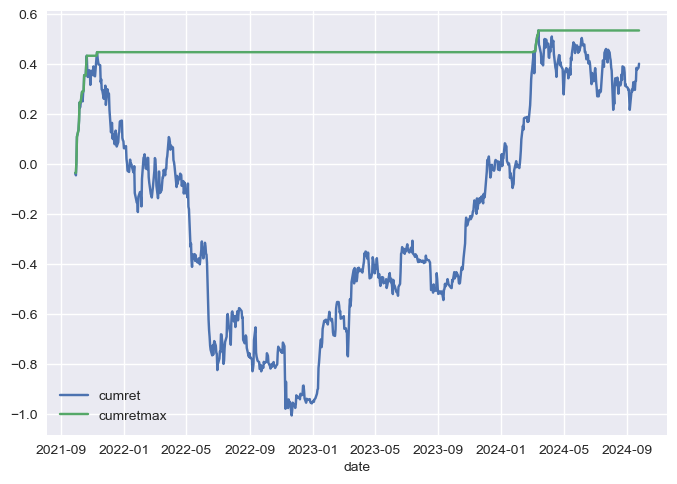

In [26]:
df[["cumlogret","cumlogretmax"]].dropna().plot()

Il drawdown è la differenza tra il massimo cumulato del rendimento cumulato e il rendimento cumulato stesso. Rappresenta il massimo guadagno che abbiamo potenzialmente raggiunto meno il rendimento attuale.

In [27]:
drawdown = df["cumlogretmax"]-df["cumlogret"]

In [28]:
drawdown.max()

1.451713634027815

In [29]:
drawdown.idxmax()

datetime.date(2022, 11, 21)

In [30]:
ib.disconnect()